Consider the evolution of a simple Hamiltonian into a problem-specific Hamiltonian where the optimal solution is 'encoded' in the ground state of the problem Hamiltonian $\displaystyle H_{\text{P}}$

$$H\left(s\right) = \left(1 - s\right)H_0 + sH_{\text{P}},\quad\text{where }H_{\text{P}} = \underbrace{A\left[\sum_{j = 0}^{M - 1}2^jy_j + \left(c + 1 - 2^M\right)y_M - \sum_{i = 1}^nw_ix_i\right]^2}_{H_A} + \underbrace{\left(-B\sum_{i = 1}^np_ix_i\right)}_{H_B}$$

for $\displaystyle s = \frac{t}{T}$ where $T$ is the total computation time


In [2]:
from qutip import tensor, basis, sigmaz, sigmaz, qeye, mesolve
import numpy as np

def tensor_sigmaz(i, n):
    ops = [qeye(2) for _ in range(n)]
    ops[i] = sigmaz()
    return tensor(ops)

def tensor_sigmaz(i, n):
    ops = [qeye(2) for _ in range(n)]
    ops[i] = sigmaz()
    return tensor(ops)

# Parameters
num_items = 7
profits = np.array([6, 5, 8, 9, 6, 7, 3])
weights = np.array([2, 3, 6, 7, 5, 8, 4])
capacity = 9
A = 1.0
B = 1.0
M = int(np.ceil(np.log2(capacity + 1)))  # Smallest M such that 2^M >= c

total_qubits = num_items + M

# Initial Hamiltonian H_0
H_0 = sum(tensor_sigmaz(i, total_qubits) for i in range(total_qubits))

# Problem Hamiltonian H_P
H_A = A * ((sum(2**j * tensor_sigmaz(num_items + j, total_qubits) for j in range(M)) +
           (capacity + 1 - 2**M) * tensor_sigmaz(num_items + M - 1, total_qubits) -
           sum(weights[i] * tensor_sigmaz(i, total_qubits) for i in range(num_items))) ** 2)

H_B = -B * sum(profits[i] * tensor_sigmaz(i, total_qubits) for i in range(num_items))

H_P = H_A + H_B

# Time-dependent Hamiltonian function
def H(t, args):
    s = t / T
    return (1 - s) * H_0 + s * H_P

T = 10
times = np.linspace(0, T, 1000)

# Initial state: equal superposition of all states
psi0 = tensor([basis(2, 0) + basis(2, 1) for _ in range(total_qubits)]).unit()

result = mesolve(H, psi0, times, [], [])

psi_final = result.states[-1]

print("Final state probabilities:")
print([abs(psi) ** 2 for psi in psi_final.full().flatten()])


c:\Users\raw_asparagus\AppData\Local\Programs\Python\Python312\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


Final state probabilities:
[np.float64(0.0027118973048702007), np.float64(0.0027118973048702267), np.float64(0.00271189730487013), np.float64(0.0027118973048702397), np.float64(0.0027118973048700958), np.float64(0.0027118973048702315), np.float64(0.0027118973048702445), np.float64(0.002711897304870201), np.float64(0.0027118973048701326), np.float64(0.002711897304870162), np.float64(0.002711897304870147), np.float64(0.0027118973048702055), np.float64(0.00271189730487024), np.float64(0.002711897304870161), np.float64(0.002711897304870091), np.float64(0.0027118973048702085), np.float64(0.001809856663802179), np.float64(0.0018098566638021635), np.float64(0.0018098566638021015), np.float64(0.0018098566638021227), np.float64(0.0018098566638021646), np.float64(0.0018098566638020867), np.float64(0.001809856663802131), np.float64(0.0018098566638021286), np.float64(0.001809856663802122), np.float64(0.001809856663802092), np.float64(0.0018098566638020737), np.float64(0.001809856663802135), np.flo

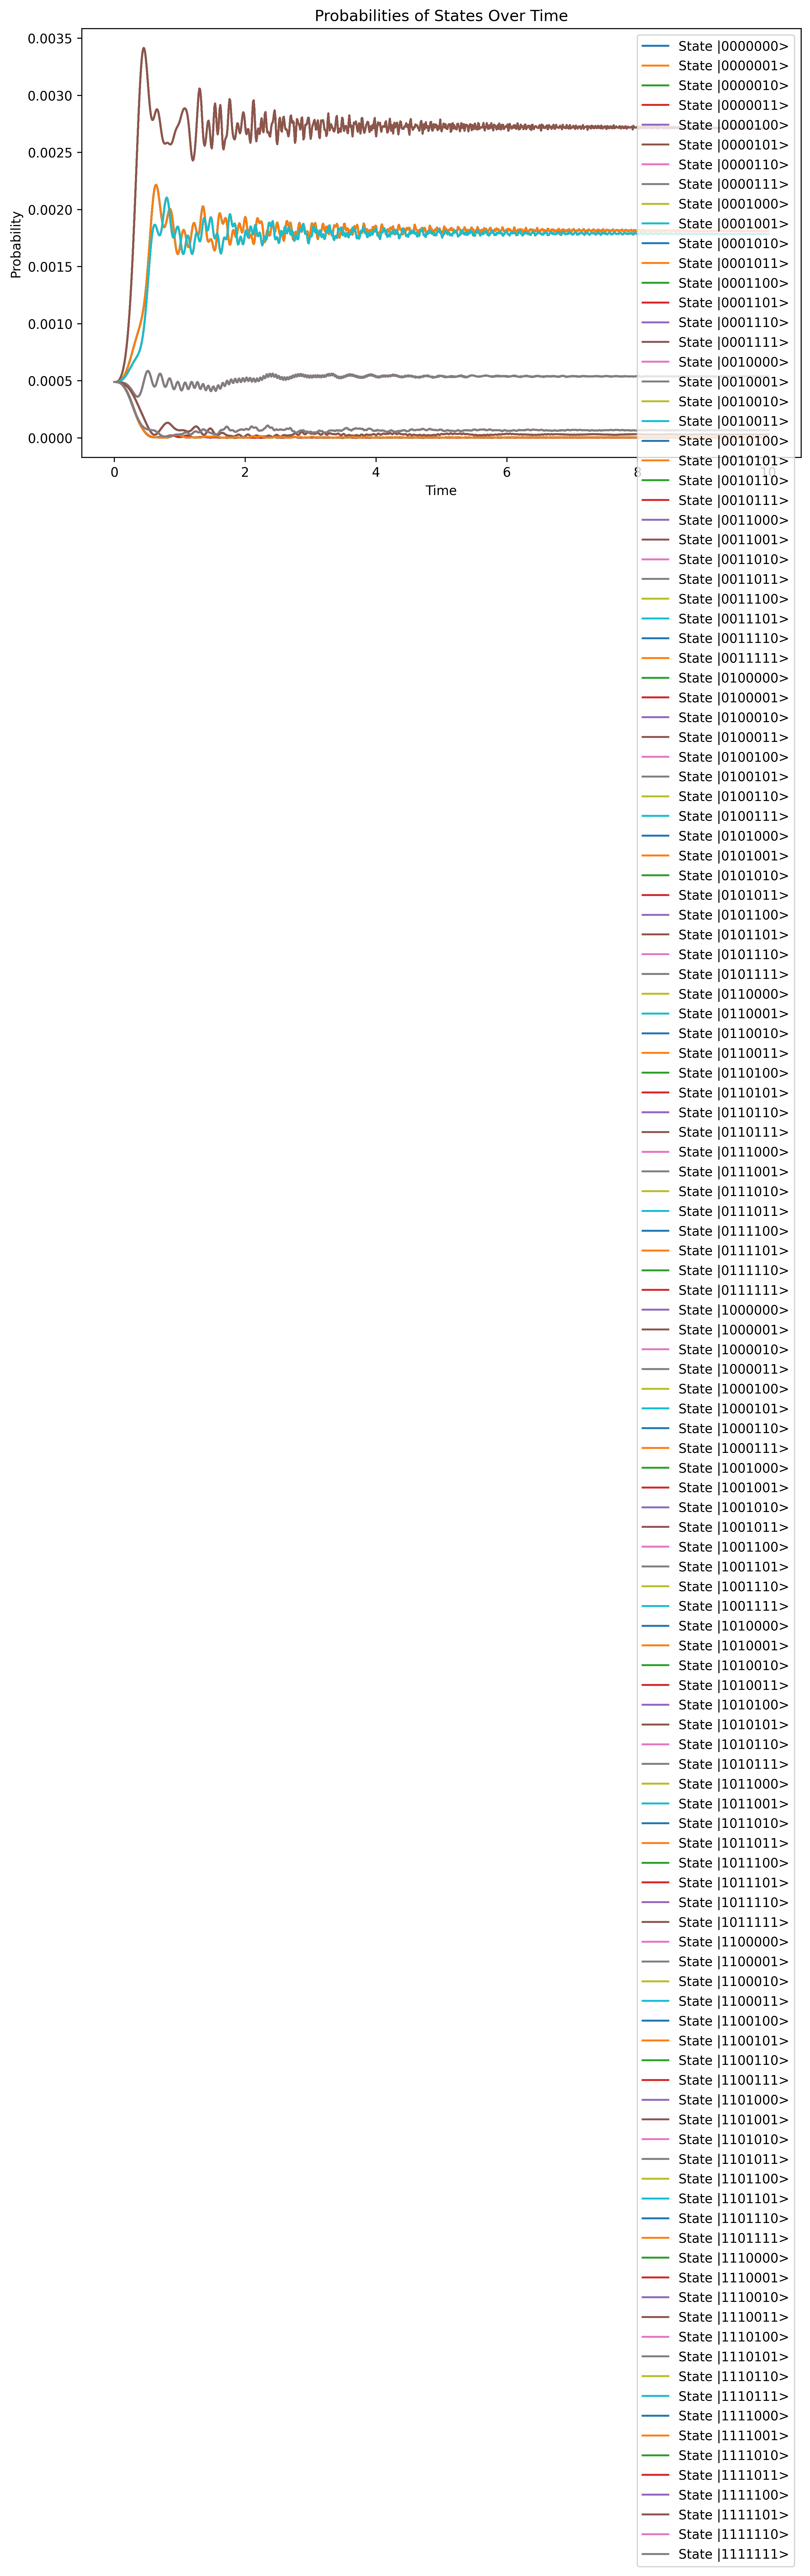

In [4]:
import matplotlib.pyplot as plt

all_probabilities = [np.abs(state.full())**2 for state in result.states]

plt.figure(figsize=(10, 6), dpi=300)
for idx in range(2**num_items):
    plt.plot(times, [prob[idx] for prob in all_probabilities], label=f'State |{format(idx, "0" + str(num_items) + "b")}>')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probabilities of States Over Time')
plt.legend()
plt.show()
